In [417]:
import numpy as np
import torch as t
from matplotlib import pyplot as plt
from matplotlib import ticker
import pandas as pd

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import csv

In [199]:
data = pd.read_csv('datasets/mobilePhones.csv')

In [573]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [574]:
#dataset = data[['battery_power','clock_speed', 'ram', 'px_height', 'px_width','three_g','touch_screen', 'wifi', 'price_range']]
dataset = data #[['battery_power','clock_speed', 'ram', 'px_height', 'px_width', 'touch_screen']]

In [575]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Lets predict has touch screen first

In [1118]:
scaler = StandardScaler()

In [1119]:
target = t.tensor(dataset[['touch_screen']].to_numpy(), dtype=t.float32)

In [1120]:
features = dataset.drop('touch_screen', axis=1).to_numpy()
#features = dataset.i
scaled_features = scaler.fit_transform(features)
ds = t.tensor(scaled_features, dtype=t.float32)

In [1121]:
class LogisticRegression(t.nn.Module):
    def __init__(self, input_features):
        super(LogisticRegression, self).__init__()
        self.linear = t.nn.Linear(input_features, 1)

    def forward(self, X):
        y = self.linear(X)
        return t.sigmoid(y)

In [1133]:
class NeuralNetwork(t.nn.Module):
    def __init__(self, input_features, hidden_size1, hidden_size2):
        super(NeuralNetwork, self).__init__()
        self.linear1 = t.nn.Linear(input_features, hidden_size1)
        self.relu1 = t.nn.SELU()        
        self.linear2 = t.nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = t.nn.ReLU()
        self.linear3 = t.nn.Linear(hidden_size2, 1)
        self.s = t.nn.Sigmoid()

    def forward(self, X):
        y = self.linear1(X)
        y = self.relu1(y)
        y = self.linear2(y)        
        y = self.relu2(y)
        y = self.linear3(y)
        y = self.s(y)
        return y

In [1134]:
2000/42

47.61904761904762

In [1135]:
#model = LogisticRegression(ds.shape[1])
model = NeuralNetwork(ds.shape[1], 20, 20)
error = t.nn.BCELoss()
#error = t.nn.BCEWithLogitsLoss()
optimizor= t.optim.Adam(model.parameters(), lr=0.01)

In [1136]:
for i in range(100):
    optimizor.zero_grad()  
    y = model(ds)
    err = error(y, target)
    err.backward()
    optimizor.step()
    with t.no_grad():
        if i % 10:           
            print(err, target[:5], y[:5])    

tensor(0.6935, grad_fn=<BinaryCrossEntropyBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]]) tensor([[0.4934],
        [0.4465],
        [0.4700],
        [0.5448],
        [0.4888]], requires_grad=True)
tensor(0.6902, grad_fn=<BinaryCrossEntropyBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]]) tensor([[0.5029],
        [0.4509],
        [0.4854],
        [0.5594],
        [0.5332]], requires_grad=True)
tensor(0.6886, grad_fn=<BinaryCrossEntropyBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]]) tensor([[0.5137],
        [0.4549],
        [0.4959],
        [0.5711],
        [0.5673]], requires_grad=True)
tensor(0.6876, grad_fn=<BinaryCrossEntropyBackward0>) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]]) tensor([[0.5226],
        [0.4586],
        [0.5023],
        [0.5763],
        [0.5865]], requires_grad=True)
tensor(0.6862, grad_fn=<BinaryCrossEntropyBackward0>) te

In [1137]:
from torcheval.metrics.functional import binary_accuracy, binary_auprc

In [1138]:
binary_accuracy(model(ds).view(-1), target.view(-1), threshold=0.6)

tensor(0.8075)

In [1139]:
binary_auprc(model(ds).view(-1),  target.view(-1))

tensor(0.8889)

In [1140]:
target.view(-1), model(ds).view(-1), model(ds).round().view(-1)

(tensor([0., 1., 1.,  ..., 1., 1., 1.]),
 tensor([0.4447, 0.9318, 0.4912,  ..., 0.1493, 0.3391, 0.8850],
        grad_fn=<ViewBackward0>),
 tensor([0., 1., 0.,  ..., 0., 0., 1.], grad_fn=<ViewBackward0>))

In [110]:
r = model(ds)

In [380]:
r.max()

0       28.11000
1       39.28000
2      188.50000
3     2501.00000
4        0.16340
5        0.34540
6        0.42680
7        0.20120
8        0.30400
9        0.09744
10       2.87300
11       4.88500
12      21.98000
13     542.20000
14       0.03113
15       0.13540
16       0.39600
17       0.05279
18       0.07895
19       0.02984
20      36.04000
21      49.54000
22     251.20000
23    4254.00000
24       0.22260
25       1.05800
26       1.25200
27       0.29100
28       0.66380
29       0.20750
dtype: float64

In [381]:
ds.shape

torch.Size([2000, 8])

In [382]:
for i,v in enumerate(data.columns):
    print(i,v)

0 battery_power
1 blue
2 clock_speed
3 dual_sim
4 fc
5 four_g
6 int_memory
7 m_dep
8 mobile_wt
9 n_cores
10 pc
11 px_height
12 px_width
13 ram
14 sc_h
15 sc_w
16 talk_time
17 three_g
18 touch_screen
19 wifi
20 price_range


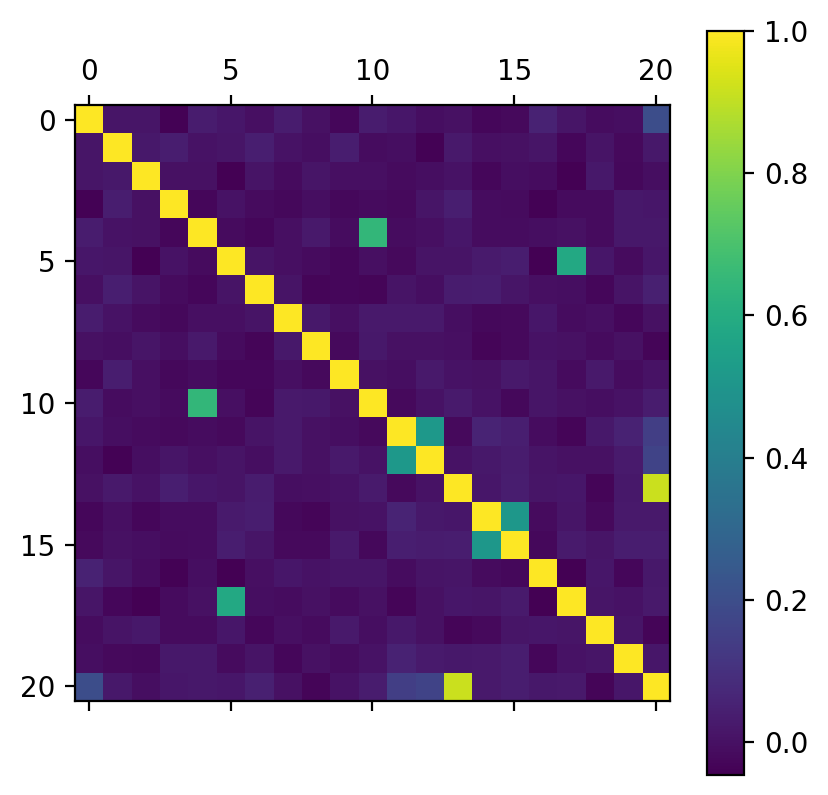

In [371]:
plt.matshow(data.corr()).figure.set_dpi(200)
plt.colorbar()

In [136]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [138]:
data.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [146]:
t.tensor([3,3,3,3,4], dtype=t.float32).softmax(dim=0)

tensor([0.1488, 0.1488, 0.1488, 0.1488, 0.4046])

In [212]:
from sklearn.datasets import load_breast_cancer

In [213]:
s = load_breast_cancer()

In [485]:
X_train, X_test, y_train, y_test = train_test_split(s.data, s.target)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [486]:
X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))
y_train = t.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_test =  t.from_numpy(y_test.astype(np.float32)).view(-1,1)

In [534]:
model1 = LogisticRegression(X_train.shape[1])
#sgd = t.optim.SGD(model1.parameters(), lr=1)
sgd = t.optim.Adamax(model1.parameters(), lr=0.1)
loss = t.nn.BCELoss()
error_list = []

In [538]:
for i in range(110):
    model1.train(True)
    y = model1(X_train)
    error = loss(y, y_train)
    sgd.zero_grad()
    error.backward()
    sgd.step()
    if i % 10 == 0:
        print(error.item())
        if len(error_list) == 0 and i == 0:
            last = 0
        elif len(error_list) > 0 and i == 0:
            last = error_list[-1][0]
        error_list.append((i+last, error.item()))

0.055810149759054184
0.05487110838294029
0.054008182138204575
0.05321130529046059
0.05247215926647186
0.05178379267454147
0.05114035680890083
0.05053684115409851
0.049968983978033066
0.04943309351801872
0.048925984650850296


In [539]:
error_list

[(0, 0.6345952153205872),
 (10, 0.09413644671440125),
 (20, 0.07759860157966614),
 (30, 0.07036977261304855),
 (40, 0.06670774519443512),
 (50, 0.06419214606285095),
 (60, 0.06226254254579544),
 (70, 0.060644522309303284),
 (80, 0.059228282421827316),
 (90, 0.05797002837061882),
 (100, 0.05683783069252968),
 (100, 0.055810149759054184),
 (110, 0.05487110838294029),
 (120, 0.054008182138204575),
 (130, 0.05321130529046059),
 (140, 0.05247215926647186),
 (150, 0.05178379267454147),
 (160, 0.05114035680890083),
 (170, 0.05053684115409851),
 (180, 0.049968983978033066),
 (190, 0.04943309351801872),
 (200, 0.048925984650850296)]

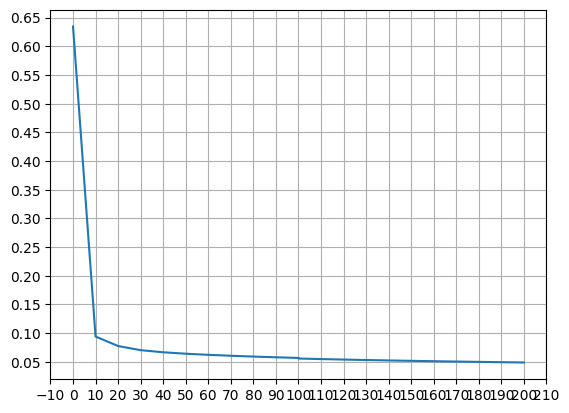

tensor(0.9859)

In [540]:
model1.eval()
plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(10))   
plt.grid()
plt.yticks([x/20 for x in range(21)])
plt.plot([x[0] for x in error_list], [x[1] for x in error_list])    
plt.show()
#binary_accuracy(model1(X_test).view(-1), y_test.view(-1))
binary_accuracy(model1(X_train).view(-1), y_train.view(-1))


In [541]:
model1(X_test).view(-1).round(), y_test.view(-1)

(tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
         1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
         1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
         1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
         1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
         0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
         1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.],
        grad_fn=<RoundBackward0>),
 tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
         1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
         1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 

In [542]:
r = pd.DataFrame(s.data)
r['result'] = s.target
r.head(100)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,result
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


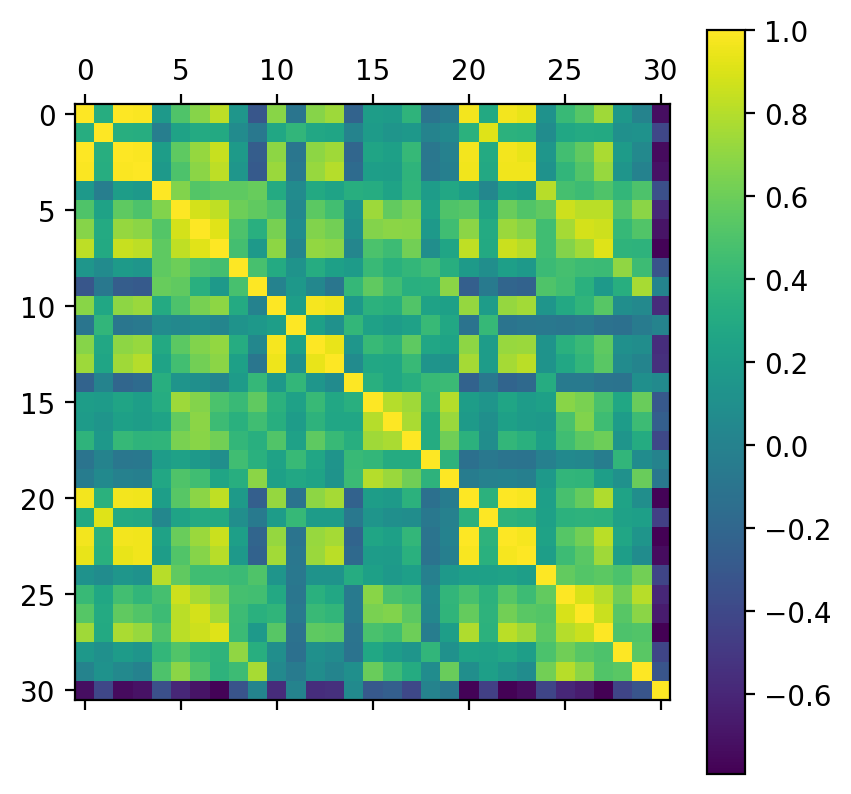

In [543]:
plt.matshow(r.corr()).figure.set_dpi(200)
plt.colorbar()
plt.show()

In [370]:
r[[1,20,21]]

,1,20,21
0,10.38,25.380,17.33
1,17.77,24.990,23.41
2,21.25,23.570,25.53
3,20.38,14.910,26.50
4,14.34,22.540,16.67
...,...,...,...
564,22.39,25.450,26.40
565,28.25,23.690,38.25
566,28.08,18.980,34.12
567,29.33,25.740,39.42
